In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
df_emissions_raw = pd.read_csv('./data/Emissions_de_GEH_a_Catalunya_20250127.csv', sep=',', decimal='.')
df_emissions_raw.sample(5)

,ANY,PROVINCIA,ACTIVITAT,IPCC_SECTOR,IPCC_DIVISIO,IPCC_CLASSE,IPCC_SUBCLASSE,NOM_SECTOR,NOM_DIVISIO,NOM_CLASSE,NOM_SUBCLASSE,CONTAMINANT,UNITATS,CO2EQ,EMISSIO GAS
5522,2020,BARCELONA,2F1a,2,F,1.0,a,Processos Industrials,Usos de productes com a substituts per a les s...,Refrigeració i aire condicionat,Refrigeració comercial,HFC-PFC,Gg,48.139363,48.139363
21530,2012,TARRAGONA,5A2,5,A,2.0,NaN,Tractament i eliminació de residus,Dipòsit en abocadors,Dipòsits no gestionats,0,CH4,Gg,5.214382,0.186228
22816,2019,TARRAGONA,2G1b,2,G,1.0,b,Processos Industrials,Producció i ús d'altres productes,Equips elèctrics,Etapa de funcionament,SF6,Gg,7.026393,0.000299
14507,2007,LLEIDA,2G3b,2,G,3.0,b,Processos Industrials,Producció i ús d'altres productes,Emissions de N2O per l'ús de productes,Ús de N2O com propel·lent en aerosols,N2O,Gg,0.006718,0.000025
15553,2013,LLEIDA,3B24,3,B,2.0,4,Agricultura,Gestió de fems,Emissions de N2O,Altre bestiar,N2O,Gg,21.514946,0.081188


In [3]:
df_emissions_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ANY             23486 non-null  int64  
 1   PROVINCIA       23486 non-null  object 
 2   ACTIVITAT       23486 non-null  object 
 3   IPCC_SECTOR     23486 non-null  int64  
 4   IPCC_DIVISIO    23486 non-null  object 
 5   IPCC_CLASSE     23222 non-null  float64
 6   IPCC_SUBCLASSE  21795 non-null  object 
 7   NOM_SECTOR      23486 non-null  object 
 8   NOM_DIVISIO     23486 non-null  object 
 9   NOM_CLASSE      23486 non-null  object 
 10  NOM_SUBCLASSE   23420 non-null  object 
 11  CONTAMINANT     23486 non-null  object 
 12  UNITATS         23486 non-null  object 
 13  CO2EQ           23486 non-null  float64
 14  EMISSIO GAS     23486 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 2.7+ MB


In [4]:
df_emissions = df_emissions_raw.groupby(['ANY', 'CONTAMINANT'])['CO2EQ'].sum().unstack()

df_emissions['Other Gases'] = df_emissions.drop(columns=['CO2', 'CH4', 'N2O'], errors='raise').sum(axis=1)
df_emissions['Total Emissions'] = df_emissions[['CO2', 'CH4', 'N2O', 'Other Gases']].sum(axis=1)
df_emissions = df_emissions[['CO2', 'CH4', 'N2O', 'Other Gases', 'Total Emissions']]
df_emissions.index.name = 'Year'

df_emissions.sample(5)

CONTAMINANT,CO2,CH4,N2O,Other Gases,Total Emissions
Year,,,,,
2020,26591.667171,5606.586852,1278.505427,819.979776,34296.739227
2016,28755.086078,6198.351814,1214.765624,1402.376614,37570.580131
2022,27454.146921,5406.389064,1213.739397,904.277962,34978.553344
1994,27865.885286,6316.920888,1432.518715,3228.750819,38844.075708
2017,29939.164766,5902.051529,1264.005677,1152.798907,38258.020878


In [5]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO2              33 non-null     float64
 1   CH4              33 non-null     float64
 2   N2O              33 non-null     float64
 3   Other Gases      33 non-null     float64
 4   Total Emissions  33 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB


In [6]:
df_emissions.describe()

CONTAMINANT,CO2,CH4,N2O,Other Gases,Total Emissions
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,31325.554548,6307.604570,1317.671031,2479.800675,41430.630825
std,4803.284524,490.917798,114.603041,1309.348651,5522.160232
min,25065.077518,5406.389064,1163.452978,819.979776,34053.042761
25%,27454.146921,5925.402693,1220.261155,1426.725346,36365.007181
50%,30145.129078,6200.813051,1280.864603,2401.912087,41381.849333
75%,34086.952676,6645.697158,1432.518715,2859.053866,45141.408648
max,41759.780690,7389.716448,1551.455543,5944.170230,51619.921170


In [7]:
df_production_raw = pd.read_excel('./data/SERIE-BALANC-1990-2022-web.xlsx', sheet_name='Producció Primària', skiprows=6, skipfooter=48)

df_production_raw

,Unnamed: 0,Unnamed: 1,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Carbó,NaN,170.400000,198.600000,142.800000,147.000000,159.000000,135.300000,137.800000,142.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Petroli,NaN,686.800000,980.900000,1012.100000,848.900000,802.300000,647.900000,503.300000,371.500000,...,369.889867,306.283887,228.098055,136.114963,121.624783,87.900978,35.782185,25.855087,4.838212,0.000000
2,Gas natural,NaN,2.300000,2.300000,2.200000,2.300000,2.100000,2.100000,1.800000,1.700000,...,1.324408,1.025533,1.618508,1.406425,2.200025,1.473368,0.667456,0.516586,0.130817,0.000000
3,Nuclear,NaN,5674.896900,5642.749530,5602.039272,5540.879403,5712.643503,5406.786216,5806.025910,5837.554710,...,6439.498618,6184.681921,6329.176776,6438.113236,6580.831378,5716.463005,6407.385337,6485.198560,6360.907818,6523.836994
4,Residus industrials no renovables,NaN,32.650000,39.971622,45.948462,47.485972,50.491684,65.567164,70.231202,79.793316,...,161.069393,180.527327,199.149262,209.702990,210.775850,176.009430,201.854500,192.566837,215.715359,200.359445
5,Energies renovables,NaN,484.277026,563.743324,652.274498,547.739964,539.805751,497.465693,659.620063,607.274901,...,1293.276358,1262.039610,1206.591979,1183.342564,1245.229041,1400.509734,1301.669451,1443.911561,1394.594593,1382.670164
6,NaN,Solar,1.200000,1.300000,1.300000,1.300000,1.300000,1.300000,1.400000,1.406517,...,70.002270,73.600679,76.082178,75.543758,77.595226,74.520571,79.207881,86.230451,97.606074,123.177894
7,NaN,Eòlica,0.003870,0.061892,0.062522,0.080549,0.119699,0.343761,0.708830,0.603061,...,280.696403,252.327821,228.629774,235.247253,248.153255,237.999387,268.191814,224.765895,230.903751,216.817770
8,NaN,Hidràulica,250.923156,295.781432,405.232748,353.072837,384.424080,333.378003,494.661808,447.910058,...,471.112715,457.334231,384.719328,345.248079,323.273772,468.672347,301.357923,442.422617,294.068063,233.503861
9,NaN,Biomassa forestal i agrària,211.500000,239.300000,211.600000,156.700000,115.600000,110.200000,108.500000,95.700000,...,222.273839,241.340586,242.903912,229.351127,263.350326,279.290557,272.146711,288.965213,318.659910,332.296629


In [8]:
df_production_raw = df_production_raw.T
df_production_raw.iloc[1, [0, 1, 2, 3, 4, 5, 14]] = df_production_raw.iloc[0, [0, 1, 2, 3, 4, 5, 14]]
df_production_raw = df_production_raw[1:]
df_production_raw.columns = df_production_raw.iloc[0]
df_production_raw = df_production_raw[1:]
df_production_raw.index.name = 'Year'

df_production_raw.head(5)

Unnamed: 1,Carbó,Petroli,Gas natural,Nuclear,Residus industrials no renovables,Energies renovables,Solar,Eòlica,Hidràulica,Biomassa forestal i agrària,Residus renovables,Biogàs,Biocarburants,Calor ambient,TOTAL
Year,,,,,,,,,,,,,,,
1990,170.4,686.8,2.3,5674.8969,32.65,484.277026,1.2,0.00387,250.923156,211.5,20.65,0.0,0.0,0.0,7051.323926
1991,198.6,980.9,2.3,5642.74953,39.971622,563.743324,1.3,0.061892,295.781432,239.3,27.3,0.0,0.0,0.0,7428.264476
1992,142.8,1012.1,2.2,5602.039272,45.948462,652.274498,1.3,0.062522,405.232748,211.6,34.079228,0.0,0.0,0.0,7457.362232
1993,147.0,848.9,2.3,5540.879403,47.485972,547.739964,1.3,0.080549,353.072837,156.7,36.320608,0.265969,0.0,0.0,7134.305339
1994,159.0,802.3,2.1,5712.643503,50.491684,539.805751,1.3,0.119699,384.42408,115.6,38.149015,0.212957,0.0,0.0,7266.340938


In [9]:
df_production_raw['Energies no renovables'] = df_production_raw[['Carbó', 'Petroli', 'Gas natural', 'Nuclear', 'Residus industrials no renovables']].sum(axis=1)

prod_order_and_names = {'Carbó': 'Coal', 'Petroli': 'Oil', 'Gas natural': 'Natural gas', 'Nuclear': 'Nuclear', 'Residus industrials no renovables': 'Non-renewable industrial waste', 'Energies no renovables': 'Non-renewable energies', 'Solar': 'Solar', 'Eòlica': 'Wind power', 'Hidràulica': 'Hydraulics', 'Biomassa forestal i agrària': 'Forest and agricultural biomass', 'Residus renovables': 'Renewable waste', 'Biogàs': 'Biogas', 'Biocarburants': 'Biofuels', 'Calor ambient': 'Ambient heat', 'Energies renovables': 'Renewable energies', 'TOTAL': 'TOTAL'}
df_production_raw = df_production_raw.rename(columns=prod_order_and_names)[prod_order_and_names.values()]

df_production_raw.head(2)

Unnamed: 1,Coal,Oil,Natural gas,Nuclear,Non-renewable industrial waste,Non-renewable energies,Solar,Wind power,Hydraulics,Forest and agricultural biomass,Renewable waste,Biogas,Biofuels,Ambient heat,Renewable energies,TOTAL
Year,,,,,,,,,,,,,,,,
1990,170.4,686.8,2.3,5674.8969,32.65,6567.0469,1.2,0.00387,250.923156,211.5,20.65,0.0,0.0,0.0,484.277026,7051.323926
1991,198.6,980.9,2.3,5642.74953,39.971622,6864.521152,1.3,0.061892,295.781432,239.3,27.3,0.0,0.0,0.0,563.743324,7428.264476


In [10]:
df_production_raw = df_production_raw.apply(pd.to_numeric, errors='raise').astype(float)

df_production_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Coal                             33 non-null     float64
 1   Oil                              33 non-null     float64
 2   Natural gas                      33 non-null     float64
 3   Nuclear                          33 non-null     float64
 4   Non-renewable industrial waste   33 non-null     float64
 5   Non-renewable energies           33 non-null     float64
 6   Solar                            33 non-null     float64
 7   Wind power                       33 non-null     float64
 8   Hydraulics                       33 non-null     float64
 9   Forest and agricultural biomass  33 non-null     float64
 10  Renewable waste                  33 non-null     float64
 11  Biogas                           33 non-null     float64
 12  Biofuels                

In [11]:
df_production_raw.describe()

Unnamed: 1,Coal,Oil,Natural gas,Nuclear,Non-renewable industrial waste,Non-renewable energies,Solar,Wind power,Hydraulics,Forest and agricultural biomass,Renewable waste,Biogas,Biofuels,Ambient heat,Renewable energies,TOTAL
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,70.295423,316.682016,1.585159,6063.804999,134.243235,6586.610832,33.814608,99.418486,362.199002,170.156609,74.613213,30.844313,18.246192,52.451229,841.743652,7428.354484
std,62.008869,283.603130,0.626524,450.878460,59.194307,426.318735,37.729359,109.109619,72.473719,79.562798,27.777033,25.812851,17.832909,80.841687,342.817657,552.123723
min,0.000000,0.000000,0.000000,5033.815067,32.650000,5321.745051,1.200000,0.003870,233.503861,80.700000,20.650000,0.000000,0.000000,0.000000,483.510125,6114.004087
25%,0.000000,121.624783,1.319633,5677.042424,79.793316,6483.091840,1.406517,0.726958,301.357923,95.700000,57.773666,0.365216,0.000000,0.000000,555.794397,7051.323926
50%,75.181440,228.098055,1.700000,6184.681921,153.855106,6672.518667,8.472007,27.270441,353.072837,144.186044,70.454413,39.538607,24.744478,0.000000,668.455625,7487.761903
75%,116.100000,371.500000,2.100000,6439.498618,180.527327,6836.134986,73.600679,228.629774,422.828728,239.300000,99.162936,54.658829,27.185415,72.817404,1206.591979,7934.558277
max,198.600000,1012.100000,2.463570,6696.378864,215.715359,7221.786512,123.177894,280.696403,494.661808,332.296629,124.503403,68.800326,58.296790,267.590504,1443.911561,8265.058644


In [12]:
df_production = df_production_raw[['Non-renewable energies', 'Renewable energies', 'TOTAL']].rename(columns={'Non-renewable energies': 'Production of Non-Renewable Energy', 'Renewable energies': 'Production of Renewable Energy', 'TOTAL': 'Total Production'})

df_production.sample(5)

Unnamed: 1,Production of Non-Renewable Energy,Production of Renewable Energy,Total Production
Year,,,
1994,6726.535187,539.805751,7266.340938
2021,6581.592206,1394.594593,7976.186799
2008,6155.571502,710.819335,6866.390837
2019,6645.689478,1301.669451,7947.358929
2022,6724.196439,1382.670164,8106.866603


In [13]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Production of Non-Renewable Energy  33 non-null     float64
 1   Production of Renewable Energy      33 non-null     float64
 2   Total Production                    33 non-null     float64
dtypes: float64(3)
memory usage: 1.0+ KB


In [14]:
df_production.describe()

Unnamed: 1,Production of Non-Renewable Energy,Production of Renewable Energy,Total Production
count,33.000000,33.000000,33.000000
mean,6586.610832,841.743652,7428.354484
std,426.318735,342.817657,552.123723
min,5321.745051,483.510125,6114.004087
25%,6483.091840,555.794397,7051.323926
50%,6672.518667,668.455625,7487.761903
75%,6836.134986,1206.591979,7934.558277
max,7221.786512,1443.911561,8265.058644


In [15]:
df_consumption_raw = pd.read_excel('./data/SERIE-BALANC-1990-2022-web.xlsx', sheet_name='Consum Primària', skiprows=6, skipfooter=51)

df_consumption_raw

,Unnamed: 0,Unnamed: 1,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Carbó,NaN,565.100000,480.800000,315.900825,250.000443,266.098134,237.099602,297.499248,341.799809,...,31.705589,31.894019,30.994070,29.841760,36.697930,30.908310,28.328920,28.044570,35.602500,34.961660
1,Petroli,NaN,8428.933670,8811.013935,8945.177316,9310.302905,9565.084192,10090.362072,10558.652751,10238.482944,...,8912.809600,9443.924635,10208.250492,10285.410187,10468.261005,10679.582843,10524.743949,9209.386912,9467.116426,10279.680273
2,Gas natural,NaN,1749.200000,1891.333448,2013.555826,1887.665605,1991.220141,2215.740834,2505.530707,3206.531999,...,5545.105279,4929.092120,5252.957645,5203.474960,5608.683944,5522.718018,5808.666812,4939.054393,5189.081854,4984.371307
3,Nuclear,NaN,5674.896900,5642.749530,5602.039272,5540.879403,5712.643503,5406.786216,5806.025910,5837.554710,...,6439.498618,6184.681921,6329.176776,6438.113236,6580.831378,5716.463005,6407.385337,6485.198560,6360.907818,6523.836994
4,Saldo intercanvis elèctrics,NaN,144.730554,254.577733,100.755163,278.852126,245.893187,406.336418,113.854136,115.481820,...,143.310408,424.133145,409.554344,403.613967,324.239661,427.329857,129.322179,83.153068,385.403339,250.945542
5,Residus industrials no renovables,NaN,32.650000,39.971622,45.948462,47.485972,50.491684,65.567164,70.231202,79.793316,...,161.069393,180.527327,199.149262,209.702990,210.775850,176.009430,201.854500,192.566837,215.715359,200.359445
6,Energies renovables,NaN,484.277026,563.630820,652.180665,547.733647,539.703046,497.496435,659.539576,607.250179,...,1330.613297,1320.596481,1274.674260,1275.306562,1352.510533,1572.864719,1505.433877,1603.708124,1521.742454,1519.020826
7,NaN,Solar tèrmica,1.200000,1.300000,1.300000,1.300000,1.300000,1.300000,1.400000,1.400000,...,26.437834,27.185626,27.910172,28.736177,29.698346,30.667509,31.692529,32.951625,34.402197,35.745154
8,NaN,Solar fotovoltaica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006517,...,37.130106,35.680112,36.485190,36.022060,36.889386,34.414768,38.829557,42.171202,51.807921,75.693358
9,NaN,Solar termoelèctrica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.434330,10.734941,11.686816,10.785521,11.007495,9.438294,8.685794,11.107623,11.395956,11.739382


In [16]:
df_consumption_raw = df_consumption_raw.T
df_consumption_raw.iloc[1, [0, 1, 2, 3, 4, 5, 6, 17]] = df_consumption_raw.iloc[0, [0, 1, 2, 3, 4, 5, 6, 17]]
df_consumption_raw = df_consumption_raw[1:]
df_consumption_raw.columns = df_consumption_raw.iloc[0]
df_consumption_raw = df_consumption_raw[1:]
df_consumption_raw.index.name = 'Year'

df_consumption_raw.head(5)

Unnamed: 1,Carbó,Petroli,Gas natural,Nuclear,Saldo intercanvis elèctrics,Residus industrials no renovables,Energies renovables,Solar tèrmica,Solar fotovoltaica,Solar termoelèctrica,Eòlica,Hidràulica,"Biomassa agrària, animal i forestal",Residus renovables,Biogàs,Biocarburants,Calor ambient,TOTAL
Year,,,,,,,,,,,,,,,,,,
1990,565.1,8428.93367,1749.2,5674.8969,144.730554,32.65,484.277026,1.2,0.0,0.0,0.00387,250.923156,211.5,20.65,0.0,0.0,0.0,17079.788151
1991,480.8,8811.013935,1891.333448,5642.74953,254.577733,39.971622,563.63082,1.3,0.0,0.0,0.061892,295.781432,239.187497,27.3,0.0,0.0,0.0,17684.077087
1992,315.900825,8945.177316,2013.555826,5602.039272,100.755163,45.948462,652.180665,1.3,0.0,0.0,0.062522,405.232748,211.506167,34.079228,0.0,0.0,0.0,17675.557529
1993,250.000443,9310.302905,1887.665605,5540.879403,278.852126,47.485972,547.733647,1.3,0.0,0.0,0.080549,353.072837,156.693684,36.320608,0.265969,0.0,0.0,17862.920103
1994,266.098134,9565.084192,1991.220141,5712.643503,245.893187,50.491684,539.703046,1.3,0.0,0.0,0.119699,384.42408,115.497295,38.149015,0.212957,0.0,0.0,18371.133887


In [17]:
df_consumption_raw['Energies no renovables'] = df_consumption_raw[['Carbó', 'Petroli', 'Gas natural', 'Nuclear', 'Saldo intercanvis elèctrics', 'Residus industrials no renovables']].sum(axis=1)

cons_order_and_names = {'Carbó': 'Coal', 'Petroli': 'Oil', 'Gas natural': 'Natural gas', 'Nuclear': 'Nuclear', 'Saldo intercanvis elèctrics': 'Electricity exchange balance', 'Residus industrials no renovables': 'Non-renewable industrial waste', 'Energies no renovables': 'Non-renewable energies', 'Solar tèrmica': 'Solar thermal', 'Solar fotovoltaica': 'Solar photovoltaic', 'Solar termoelèctrica': 'Solar thermoelectric', 'Eòlica': 'Wind power', 'Hidràulica': 'Hydraulics', 'Biomassa agrària, animal i forestal': 'Agricultural, animal and forest biomass', 'Residus renovables': 'Renewable waste', 'Biogàs': 'Biogas', 'Biocarburants': 'Biofuels', 'Calor ambient': 'Ambient heat', 'Energies renovables': 'Renewable energies', 'TOTAL': 'TOTAL'}
df_consumption_raw = df_consumption_raw.rename(columns=cons_order_and_names)[cons_order_and_names.values()]

df_consumption_raw.head(2)

Unnamed: 1,Coal,Oil,Natural gas,Nuclear,Electricity exchange balance,Non-renewable industrial waste,Non-renewable energies,Solar thermal,Solar photovoltaic,Solar thermoelectric,Wind power,Hydraulics,"Agricultural, animal and forest biomass",Renewable waste,Biogas,Biofuels,Ambient heat,Renewable energies,TOTAL
Year,,,,,,,,,,,,,,,,,,,
1990,565.1,8428.93367,1749.2,5674.8969,144.730554,32.65,16595.511124,1.2,0.0,0.0,0.00387,250.923156,211.5,20.65,0.0,0.0,0.0,484.277026,17079.788151
1991,480.8,8811.013935,1891.333448,5642.74953,254.577733,39.971622,17120.446267,1.3,0.0,0.0,0.061892,295.781432,239.187497,27.3,0.0,0.0,0.0,563.63082,17684.077087


In [18]:
df_consumption_raw = df_consumption_raw.apply(pd.to_numeric, errors='raise').astype(float)

df_consumption_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Coal                                     33 non-null     float64
 1   Oil                                      33 non-null     float64
 2   Natural gas                              33 non-null     float64
 3   Nuclear                                  33 non-null     float64
 4   Electricity exchange balance             33 non-null     float64
 5   Non-renewable industrial waste           33 non-null     float64
 6   Non-renewable energies                   33 non-null     float64
 7   Solar thermal                            33 non-null     float64
 8   Solar photovoltaic                       33 non-null     float64
 9   Solar thermoelectric                     33 non-null     float64
 10  Wind power                               33 non-null

In [19]:
df_consumption_raw.describe()

Unnamed: 1,Coal,Oil,Natural gas,Nuclear,Electricity exchange balance,Non-renewable industrial waste,Non-renewable energies,Solar thermal,Solar photovoltaic,Solar thermoelectric,Wind power,Hydraulics,"Agricultural, animal and forest biomass",Renewable waste,Biogas,Biofuels,Ambient heat,Renewable energies,TOTAL
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,184.106127,10557.023416,4606.445237,6063.804999,346.846794,134.243235,21892.469807,13.886477,16.806429,3.121702,99.418486,362.199002,144.852520,74.613213,30.844313,101.024091,52.451229,899.217463,22791.687270
std,141.057679,1171.996884,1612.948721,450.878460,192.261069,59.194307,2700.783554,13.083392,20.706241,4.888483,109.109619,72.473719,55.973527,27.777033,25.812851,111.814135,80.841687,405.988262,2795.491027
min,28.044570,8428.933670,1749.200000,5033.815067,83.153068,32.650000,16595.511124,1.200000,0.000000,0.000000,0.003870,233.503861,80.690000,20.650000,0.000000,0.000000,0.000000,482.800125,17079.788151
25%,34.961660,9565.084192,3206.531999,5677.042424,212.571765,79.793316,20937.404340,1.400000,0.003978,0.000000,0.726958,301.357923,95.675278,57.773666,0.365216,0.000000,0.000000,542.808651,21492.951887
50%,209.413128,10524.743949,5189.081854,6184.681921,336.484112,153.855106,22376.691175,7.831683,0.640325,0.000000,27.270441,353.072837,118.054044,70.454413,39.538607,28.020828,0.000000,660.830013,23704.756850
75%,267.075003,11265.078036,5921.607633,6439.498618,423.476613,180.527327,23238.628948,27.185626,35.680112,8.685794,228.629774,422.828728,192.312954,99.162936,54.658829,206.272361,72.817404,1275.306562,24605.735573
max,565.100000,12571.711855,6719.985089,6696.378864,826.421046,215.715359,25746.971292,35.745154,75.693358,11.739382,280.696403,494.661808,253.522119,124.503403,68.800326,331.136652,267.590504,1603.708124,26350.873978


In [20]:
df_consumption = df_consumption_raw[['Non-renewable energies', 'Renewable energies', 'TOTAL']].rename(columns={'Non-renewable energies': 'Consumption of Non-Renewable Energy', 'Renewable energies': 'Consumption of Renewable Energy', 'TOTAL': 'Total Consumption'})

df_consumption.sample(5)

Unnamed: 1,Consumption of Non-Renewable Energy,Consumption of Renewable Energy,Total Consumption
Year,,,
2012,22305.534597,1269.315323,23574.849919
2017,23229.489767,1352.510533,24582.000300
1992,17023.376864,652.180665,17675.557529
1991,17120.446267,563.630820,17684.077087
2015,22430.082590,1274.674260,23704.756850


In [21]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1990 to 2022
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Consumption of Non-Renewable Energy  33 non-null     float64
 1   Consumption of Renewable Energy      33 non-null     float64
 2   Total Consumption                    33 non-null     float64
dtypes: float64(3)
memory usage: 1.0+ KB


In [22]:
df_consumption.describe()

Unnamed: 1,Consumption of Non-Renewable Energy,Consumption of Renewable Energy,Total Consumption
count,33.000000,33.000000,33.000000
mean,21892.469807,899.217463,22791.687270
std,2700.783554,405.988262,2795.491027
min,16595.511124,482.800125,17079.788151
25%,20937.404340,542.808651,21492.951887
50%,22376.691175,660.830013,23704.756850
75%,23238.628948,1275.306562,24605.735573
max,25746.971292,1603.708124,26350.873978


In [24]:
df_concated = pd.concat([df_production, df_consumption, df_emissions], axis=1)

df_concated.head(2)

,Production of Non-Renewable Energy,Production of Renewable Energy,Total Production,Consumption of Non-Renewable Energy,Consumption of Renewable Energy,Total Consumption,CO2,CH4,N2O,Other Gases,Total Emissions
Year,,,,,,,,,,,
1990,6567.046900,484.277026,7051.323926,16595.511124,484.277026,17079.788151,25065.077518,6125.122896,1175.864876,1686.977471,34053.042761
1991,6864.521152,563.743324,7428.264476,17120.446267,563.630820,17684.077087,26011.810956,5870.054213,1179.698817,1836.643826,34898.207812


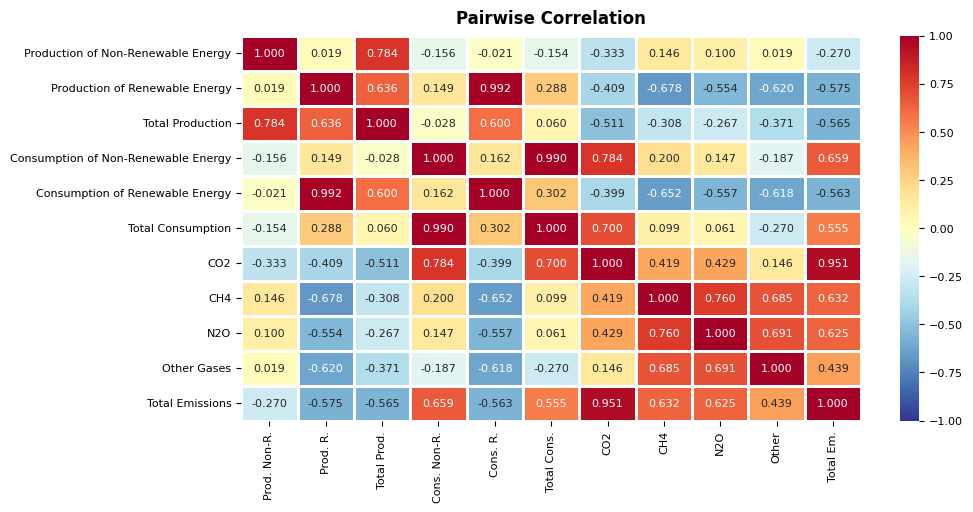

In [26]:
ticklabels = ['Prod. Non-R.', 'Prod. R.', 'Total Prod.', 'Cons. Non-R.', 'Cons. R.', 'Total Cons.', 'CO2', 'CH4', 'N2O', 'Other', 'Total Em.']

correlation_matrix = df_concated.corr()

fig, ax = plt.subplots(figsize=(10, 5))

heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1,
    vmax=1,
    cmap='RdYlBu_r',
    annot=True,
    annot_kws={'size': 8},
    fmt='.3f',
    cbar=True,
    linewidths=1,
    xticklabels=ticklabels,
    ax=ax
)

ax.set_title('Pairwise Correlation', fontweight='bold', verticalalignment='bottom')
ax.tick_params(labelsize=8)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.show()

In [28]:
slope, intercept, r_value, p_value, std_err = linregress(df_concated['Total Emissions'], df_concated['Production of Renewable Energy'])

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")

Trend: -0.04
Intercept: 2320.34
Correlation coefficient: -0.57
P-value: 0.0004665575
Standard error: 0.01
YES, significant


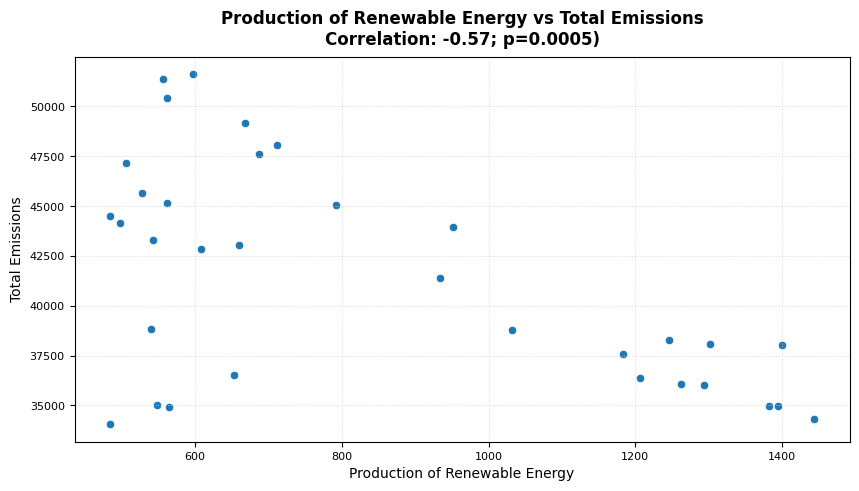

In [33]:
#correlation, p_value = stats.pearsonr(df_concated['Production of Renewable Energy'], df_concated['Total Emissions'])

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(
    x=df_concated['Production of Renewable Energy'],
    y=df_concated['Total Emissions'],
    ax=ax
)

ax.set_title(f'Production of Renewable Energy vs Total Emissions\nCorrelation: {r_value:.2f}; p={p_value:.4f})', fontweight='bold', verticalalignment='bottom')
ax.set_xlabel('Production of Renewable Energy')
ax.set_ylabel('Total Emissions')
ax.grid(linestyle=':', color='lightgray', linewidth=0.7, alpha=0.8)
ax.tick_params(labelsize=8)
#ax.set_ylim(0, 3.5)
#ax.set_xlim(0, 200)
#ax.set_xticks(range(0, 201, 20))

plt.show()